In [1]:
BASEDIR = "."

import pandas
dep_data = pandas.read_csv(
    BASEDIR + '/../deployment/benchmark.log',
    delim_whitespace=True,
    header=None,
    comment='#',
)


In [2]:
dep_data.columns = ['workers', 'deploy_time'] 
dep_data

,workers,deploy_time
0,5,1336.130519
1,10,1337.644074
2,15,1520.509719
3,20,1680.296998
4,25,1950.925702
5,30,2399.047679
6,35,2602.283524
7,40,3011.058904
8,45,3560.645375
9,50,4284.969123


In [3]:
dep_grouped = dep_data.groupby(
    ['workers']
).agg(
    {'deploy_time':['mean','std']}
)
dep_grouped.head()


deploy_time           
                mean        std
workers                        
5        1343.555120   6.561987
10       1322.265846  21.748098
15       1494.001167  37.488754
20       1684.004469   5.243156
25       1926.510638  34.528116

In [4]:
final = dep_grouped.reset_index()
final.columns = ['workers', 'mean', 'std']
final.head()

,workers,mean,std
0,5,1343.555120,6.561987
1,10,1322.265846,21.748098
2,15,1494.001167,37.488754
3,20,1684.004469,5.243156
4,25,1926.510638,34.528116


In [5]:
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt


def create_sane_figure():
    # You typically want your plot to be ~1.33x wider than tall.
    # Common sizes: (10, 7.5) and (12, 9)
    fig = plt.figure(figsize=(12, 6))  # a new figure window
    ax = fig.add_subplot(1, 1, 1)      # specify (nrows, ncols, axnum)

    # Put the axis behind the datapoints
    ax.set_axisbelow(True)
    # Grey ticks, labels, and axis'
    for spine in ax.spines.values():
        spine.set_color('black')
    for line in ax.get_xticklines() + ax.get_yticklines():
        line.set_color('black')
    ax.set_xlabel(None, fontsize=16, color='black')
    ax.set_ylabel(None, fontsize=16, color='black')
    # Don't show a grid
    ax.grid(False)
    # remove top and right border of graph
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(
        axis='both', which='both',
        labelsize=14, labelcolor='black',
        color='black')
    # Make the title big enough so it spans the entire plot, but don't make it
    # so big that it requires two lines to show.
    ax.set_title(None, fontsize=22, color='black')
    return (fig, ax)

WOLOLO


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


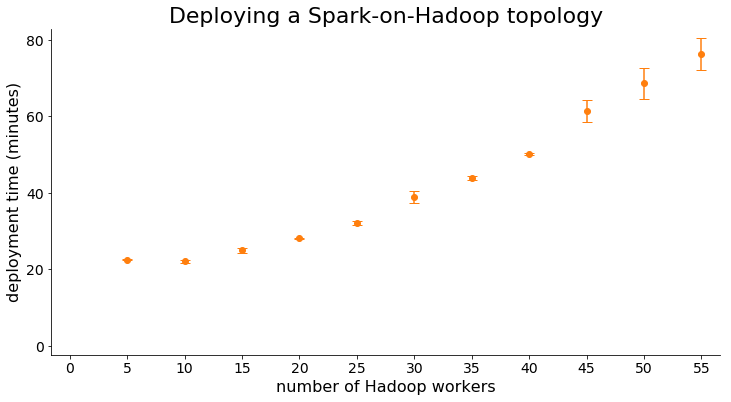

In [12]:
%matplotlib inline
import matplotlib 

def create_deployment_graph():
    (fig, ax) = create_sane_figure()

    ax.set_title("Deploying a Spark-on-Hadoop topology", fontsize=22)
    ax.set_xlabel("number of Hadoop workers")
    ax.set_ylabel("deployment time (minutes)")

    ax.set_xticks(range(0, 61, 5))
    ax.set_yticks(range(0, 3*60*60, 20*60))

    # Now put the actual data in the plot
    b = ax.errorbar(
        final['workers'], final['mean'],
        yerr=final['std'],
        linestyle='None',
        capsize=5,
        fmt='o',
        color="#ff7f0e",
    )
    ax.plot([0], [0], color='white')  # make sure graph starts at 0
    ax.margins(0.03)
    from matplotlib import ticker
        
    def major_formatter(x, pos):
        #hours, remainder = divmod(x, 3600)
        #minutes, seconds = divmod(remainder, 60) 
        #duration_formatted = '%02d:%02d:%02d' % (hours, minutes, seconds)
        minutes = x/60
        duration_formatted = "{:.0f}".format(minutes)
                
        return duration_formatted
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(major_formatter))
    
    # Save the plot to a file
    fig.savefig("soy_cluster.pdf", bbox_inches="tight")
    fig.show()
    print("WOLOLO")
    
    
create_deployment_graph()